# Analysis of Daily Elspot Data

This notebook uses daily nordic elspot data from Nordpool and the forcasting tool Prophet to investigate trends and seasonalities in the elspot price over the time peroid between 2013 and 2017.

Prices are in EUR/MWH


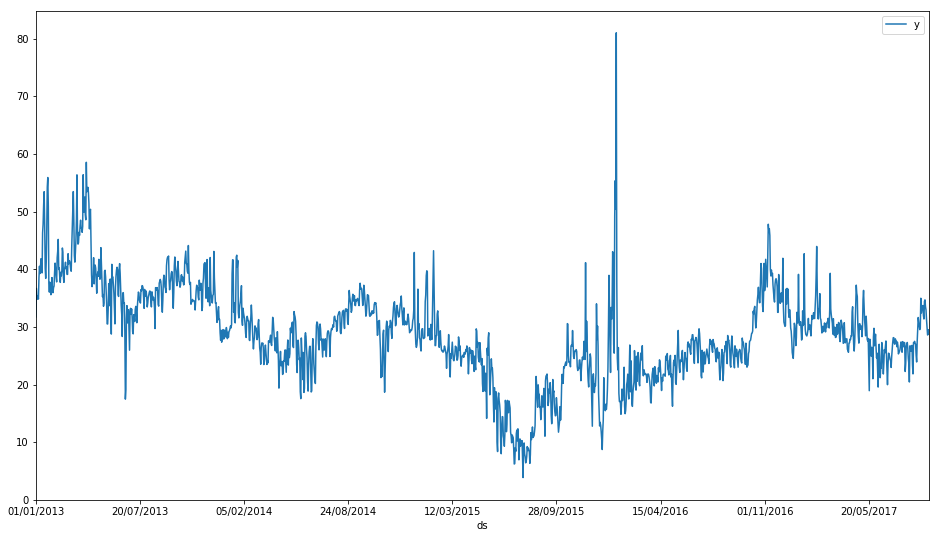

In [5]:
%matplotlib inline 
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Read dataset from csv
df = pd.read_csv('../datasets/nordic_elspot_daily_nordpool.csv')#, parse_dates=['Date'])

# Select desired data and format into format Prophet expects
area = 'SYS'
df = df[['Date',area]]
df = df.rename(columns={'Date': 'ds', area: 'y'})

df.set_index('ds').plot(figsize=(16,9))

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


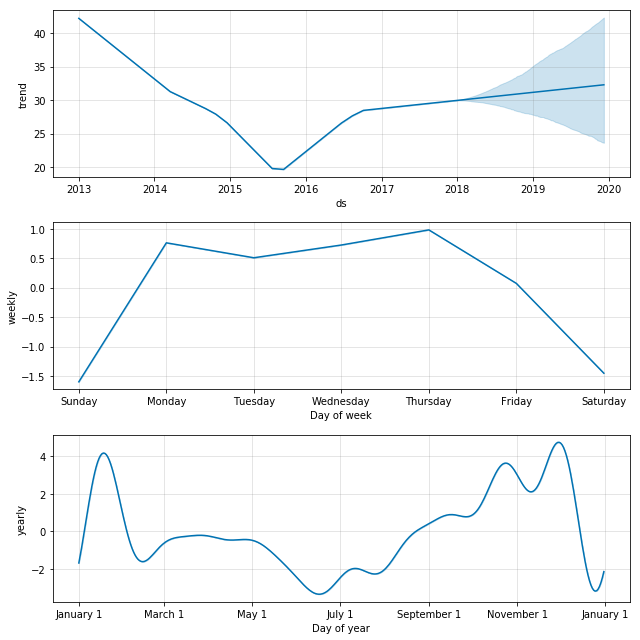

In [3]:
# Initialise prophet and input data
m = Prophet()
m.fit(df)
#m.params

# Specify timeinterval to forecast (2 years)
future_data = m.make_future_dataframe(periods=730, freq='D')
forecast = m.predict(future_data)

m.plot_components(forecast);

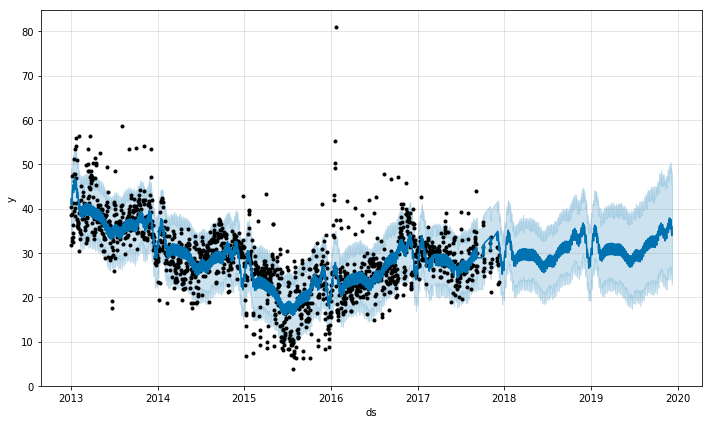

In [6]:
m.plot(forecast);